# Bayesian and Gaussian Process regression

    Notebook version: 1.1 (Sep 29, 2017)

    Authors: Miguel Lázaro Gredilla
             Jerónimo Arenas García (jarenas@tsc.uc3m.es)
             Jesús Cid Sueiro (jesus.cid@uc3m.es)

    Changes: v.1.0 - First version. Python version
             v.1.1 - Python 3 compatibility. ML section.
    
    Pending changes: 

In [1]:
# Import some libraries that will be necessary for working with data and displaying plots

# To visualize plots in the notebook
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np
import scipy.io       # To read matlab files
from scipy import spatial
import pylab
pylab.rcParams['figure.figsize'] = 8, 5

## 1. Introduction

In this exercise the student will review several key concepts of Bayesian regression and Gaussian processes.

For the purpose of this exercise, the regression model is

$${s}({\bf x}) = f({\bf x}) + \varepsilon$$

where ${s}({\bf x})$ is the output corresponding to input ${\bf x}$, $f({\bf x})$ is the unobservable latent function, and $\varepsilon$ is white zero-mean Gaussian noise, i.e., $\varepsilon \sim {\cal N}(0,\sigma_\varepsilon^2)$.


### Practical considerations

   - Though sometimes unavoidable, it is recommended not to use explicit matrix inversion whenever possible. For instance, if an operation like ${\mathbf A}^{-1} {\mathbf b}$ must be performed, it is preferable to code it using python $\mbox{numpy.linalg.lstsq}$ function (see http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html), which provides the LS solution to the overdetermined system ${\mathbf A} {\mathbf w} = {\mathbf b}$.
   
   - Sometimes, the computation of $\log|{\mathbf A}|$ (where ${\mathbf A}$ is a positive definite matrix) can overflow available precision, producing incorrect results. A numerically more stable alternative, providing the same result is $2\sum_i \log([{\mathbf L}]_{ii})$, where $\mathbf L$ is the Cholesky decomposition of $\mathbf A$ (i.e., ${\mathbf A} = {\mathbf L}^\top {\mathbf L}$), and $[{\mathbf L}]_{ii}$ is the $i$th element of the diagonal of ${\mathbf L}$.
   
   - Non-degenerate covariance matrices, such as the ones in this exercise, are always positive definite. It may happen, as a consequence of chained rounding errors, that a matrix which was mathematically expected to be positive definite, turns out not to be so. This implies its Cholesky decomposition will not be available. A quick way to palliate this problem is by adding a small number (such as $10^{-6}$) to the diagonal of such matrix.

### Reproducibility of computations

To guarantee the exact reproducibility of the experiments, it may be useful to start your code initializing the seed of the random numbers generator, so that you can compare your results with the ones given in this notebook.

In [2]:
np.random.seed(3)

## 2. Data generation with a linear model

During this section, we will assume the following parametric model for the latent function

$$f({\bf x}) = {\bf w}^\top {\bf z}$$

where ${\bf z} = (1, {\bf x}^\top)^\top$. This is a linear model in the observations, where ${\bf w}$ contains the parameters of the model. The <i>a priori</i> distribution of ${\bf w}$ is assumed to be

$${\bf w} \sim {\cal N}({\bf 0}, \sigma_p^2~{\bf I})$$

### 2.1. Synthetic data generation

First, we are going to generate synthetic data (so that we have the ground-truth model) and use them to make sure everything works correctly and our estimations are sensible.

* [1] Set parameters $\sigma_p^2 = 2$ and $\sigma_{\varepsilon}^2 = 0.2$. To do so, define variables `sigma_p` and `sigma_eps` containing the respectiv standard deviations.

In [3]:
# Parameter settings
# sigma_p = <FILL IN>
# sigma_eps = <FILL IN>
 

* [2] Generate a weight vector $\mbox{true_w}$ with two elements from the <i>a priori</i> distribution of the weights. This vector determines the regression line that we want to find (i.e., the optimum unknown solution).

In [4]:
# Data dimension:
dim_x = 2

# Generate a parameter vector taking a random sample from the prior distributions
# (the np.random module may be usefull for this purpose)
# true_w = <FILL IN>

print('The true parameter vector is {0}'.format(true_w))

The true parameter vector is [ 2.52950265  0.61731815]


* [3] Generate an input matrix $\mbox{X}$ containing 20 samples equally spaced values between 0 and 2 in the second column.

In [5]:
# <SOL>
# </SOL>

* [4] Finally, generate the output vector ${\mbox s}$ as the product $\mbox{X} \ast \mbox{true_w}$ plus Gaussian noise of pdf ${\cal N}(0,\sigma_\varepsilon^2)$ at each element.

In [6]:
# Expand input matrix with an all-ones column
col_1 = np.ones((n_points,))
# Xe = <FILL IN>

# Generate values of the target variable
# s = <FILL IN>
 

### 2.2. Data visualization

* Plot the generated data. You will notice a linear behavior, but the presence of noise makes it hard to estimate precisely the original straight line that generated them (which is stored in $\mbox{true_w}$).

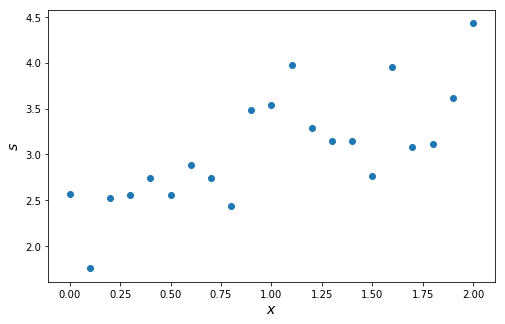

In [7]:
# <SOL> 
# </SOL>

## 3. Maximum Likelihood (ML) regression

### 3.1. Likelihood function


i.e., a linear model in the observations, where ${\bf w}$ contains the parameters of the model. The <i>a priori</i> distribution of ${\bf w}$ is assumed to be

$${\bf w} \sim {\cal N}({\bf 0}, \sigma_p^2~{\bf I})$$

* [1] Define a function `predict(we, Xe)` that computes the linear predictions for all inputs in data matrix `Xe` (a 2-D numpy arry), for a given parameter vector `we` (a 1-D numpy array). The output should be a 1-D array. Test your function with the given dataset and `we = [0.4, 0.7]`

In [8]:
# <SOL>
# </SOL>

# Print predictions
print(p)

[ 0.4   0.47  0.54  0.61  0.68  0.75  0.82  0.89  0.96  1.03  1.1   1.17
  1.24  1.31  1.38  1.45  1.52  1.59  1.66  1.73  1.8 ]


* [2] Define a function `sse(we, X, s)` that computes the sum of squared errors (SSE) for the linear prediction with parameters `we ` (1D numpy array), inputs `Xe `  (2D numpy array) and targets `s ` (1D numpy array). Using this function, compute the SSE of the true parameter vector in `true_w`.

In [9]:
# <SOL>
# </SOL>

print(" The SSE is: {0}".format(SSE))

 The SSE is: 3.8420886935286145


* [3] Define a function `likelihood(we, Xe, s)` that computes the likelihood of parameter vector `we` for a given dataset in matrix `Xe` and vector `s`. Note that this function can use the `sse` function defined above. Using this function, compute the likelihood of the true parameter vector in `true_w`.

In [10]:
# <SOL>
# </SOL>

print("The likelihood of the true parameter vector is {0}".format(L_w_true))

The likelihood of the true parameter vector is 6.120707579477163e-06


* [4] In order to visualize the likelihood function, generate a set of points in a two dimensional grid going from $(-\sigma_p, -\sigma_p)$ to $(\sigma_p, \sigma_p)$, compute the likelihood for all these points and visualize them using a 2-dimensional plot

[ 2.52950265  0.61731815]


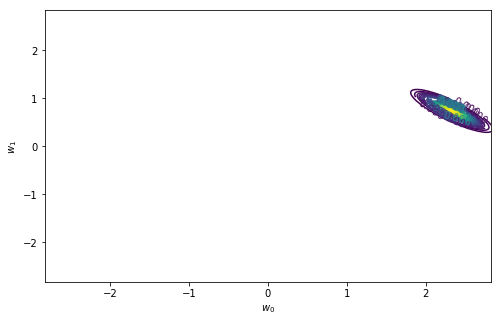

In [11]:
# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
N = 200    # Number of points along each dimension.
# w0_grid = np.linspace(<FILL IN>)
# w1_grid = np.linspace(<FILL IN>)


Lw = np.zeros((N,N))
# Fill Lw with the likelihood values
# < write  your code here>
# <SOL>
# </SOL>

WW0, WW1 = np.meshgrid(w0_grid, w1_grid, indexing='ij')
contours = plt.contour(WW0, WW1, Lw, 50)

plt.figure
plt.clabel(contours)
plt.scatter([true_w[0]]*2, [true_w[1]]*2, s=[50,10], color=['k','w'])
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')

print(true_w)

### 3.2. ML estimate

* [1] Compute the ML estimate of $w_e$ given the data.

In [12]:
# <SOL>
# </SOL>

print(w_ML)

[ 2.33012392  0.73283365]


* [2] Compute the maximum likelihood

In [13]:
# <SOL>
# </SOL>

print('Maximum likelihood: {0}'.format(L_w_ML))

Maximum likelihood: 1.1447611278561242e-05


### 3.3. Convergence of the ML estimate for the true model

Note that the likelihood of the true parameter vector is, in general, smaller than that of the ML estimate. However, as the sample size increasis, both should converge to the same value.

* [1] Generate a longer dataset, with $K_\text{max}=2^{16}$ samples, uniformly spaces between 0 and 2. Store it in the 2D-array `X2` and the 1D-array `s2`

In [14]:
# Parameter settings
x_min = 0
x_max = 2
n_points = 2**16

# <SOL>
# </SOL>

* [2] Compute the ML estimate based on the first $2^k$ samples, for $k=2,3,\ldots, 16$. For each value of $k$ compute the squared euclidean distance between the true parameter vector and the ML estimate. Represent it graphically (using a logarithmic scale in the y-axis).

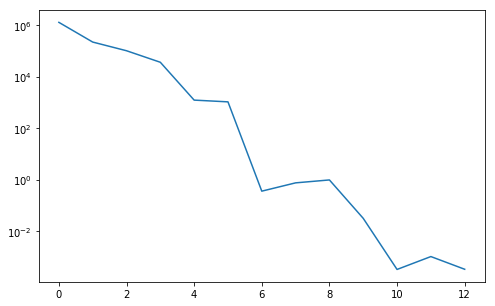

In [15]:
# <SOL>
# </SOL>

## 4. Bayesian regression

### 4.1. Posterior pdf of the weight vector

In this section we will visualize prior and the posterior distribution functions. First, we will restore the dataset at the begining of this notebook:

In [16]:
np.random.seed(3)
n_points = 21
true_w = sigma_p * np.random.randn(dim_x)
X = np.linspace(x_min, x_max, n_points)
col_1 = np.ones((n_points,))
Xe = np.vstack((col_1, X)).T
s = Xe.dot(true_w) + sigma_eps * np.random.randn(n_points)

* [1] Define a function `posterior_stats(Xe, s)` that computes the parameters of the posterior coefficient distribution given the dataset in matrix `Xe` and vector `s`. This function should return the posterior mean, the covariance matrix and the precision matrix (the inverse of the covariance matrix). Test the function to the given dataset.

In [17]:
# <SOL>
# </SOL>

mean_w, Cov_w, iCov_w = posterior_stats(Xe, s)

print('true_w = {0}'.format(true_w))
print('mean_w = {0}'.format(mean_w))
print('Cov_w = {0}'.format(Cov_w))
print('iCov_w = {0}'.format(iCov_w))

true_w = [ 2.52950265  0.61731815]
mean_w = [ 2.29909556  0.75291393]
Cov_w = [[ 0.03455724 -0.02519798]
 [-0.02519798  0.02531797]]
iCov_w = [[ 105.5  105. ]
 [ 105.   144. ]]


* [2] Define a function `gauss_pdf(we, mean_w, iCov_w)` that computes the Gaussian pdf with mean `mean_w` and precision matrix `iCov_w`. Use this function to compute and compare the posterior pdf value of the true coefficients, the ML estimate and the MSE estimate, given the dataset.

In [18]:
# <SOL>
# </SOL>

print('p(true_w | s)  = {0}'.format(gauss_pdf(true_w, mean_w, iCov_w)))
print('p(w_ML | s)  = {0}'.format(gauss_pdf(w_ML, mean_w, iCov_w)))
print('p(w_MSE | s)  = {0}'.format(gauss_pdf(mean_w, mean_w, iCov_w)))

p(true_w | s)  = 4.418779802326538
p(w_ML | s)  = 10.126974918448937
p(w_MSE | s)  = 10.273818329102646


* [3] The function `computePW` computes the posterior distribution over a grid of points. Use this function to compute a bidimensional plot of the prior and the posterior distributions.

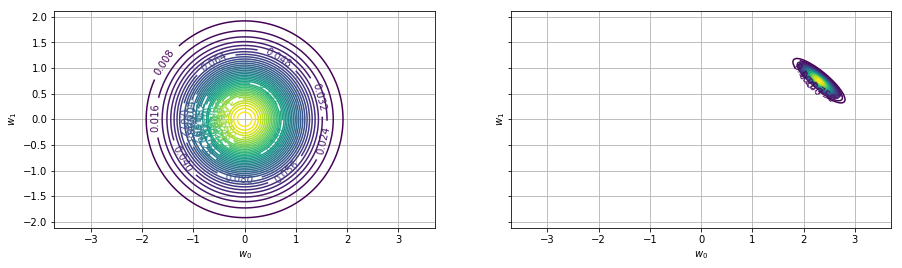

In [19]:
def computePW(N, lims, mean_w, iCov_w):

    # First construct a grid of (theta0, theta1) parameter pairs and their
    # corresponding cost function values.
    w0_grid = np.linspace(lims[0], lims[1], N)
    w1_grid = np.linspace(lims[2], lims[3], N)

    Pw = np.zeros((N,N))
    for i, w0i in enumerate(w0_grid):
        for j, w1j in enumerate(w1_grid):
            we = np.array((w0i, w1j)) 
            Pw[i, j] = gauss_pdf(we, mean_w, iCov_w)

    WW0, WW1 = np.meshgrid(w0_grid, w1_grid, indexing='ij')

    return Pw, WW0, WW1

# Common parameters for all plots
lims = sigma_p*np.array([-3, 3, -1.5, 1.5])
N = 200

# Define figure with two subplots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))

# Compute the values of the prior distribution
# Pw, WW0, WW1 = computePW(<FILL IN>)
contours = ax1.contour(WW0, WW1, Pw, 40)
ax1.clabel(contours)
ax1.set_xlabel('$w_0$')
ax1.set_ylabel('$w_1$')
ax1.axis('equal')
ax1.grid('on')

# Compute the values of the posterior distribution
# Pw, WW0, WW1 = computePW(<FILL IN>)
contours = ax2.contour(WW0, WW1, Pw, 40)
ax2.clabel(contours)
ax2.set_xlabel('$w_0$')
ax2.set_ylabel('$w_1$')
ax2.axis('equal')
ax2.grid('on')
plt.show()

### 4.2. Sampling regression curves from the posterior

In this section we will plot the functions corresponding to different samples drawn from the posterior distribution of the weight vector. 

To this end, we will first generate an input dataset of equally spaced samples. We will compute the functions at these points

In [20]:
# Definition of the interval for representation purposes 
x2_min = -1
x2_max = 3
n_points = 2   # Only two points are needed to plot a straigh line

# Build the input data matrix:
# Input values for representation of the regression curves
X2 = np.linspace(x2_min, x2_max, n_points)
col_1 = np.ones((n_points,))
X2e = np.vstack((col_1, X2)).T

Generate random vectors ${\bf w}_l$ with $l = 1,\dots, 50$, from the posterior density of the weights, $p({\bf w}\mid{\bf s})$, and use them to generate 50 straight lines, $f({\bf x}^\ast) = {{\bf x}^\ast}^\top {\bf w}_l$, with the second component of ${\bf x}^\ast$ between $-1$ and $3$, with step $0.1$.

Plot the original ground-truth straight line, corresponding to $\mbox{true_w}$, along with the $50$ generated straight lines and the original samples, all in the same plot. As you can check, the Bayesian model is not providing a single answer, but instead a density over them, from which we have extracted 50 options.

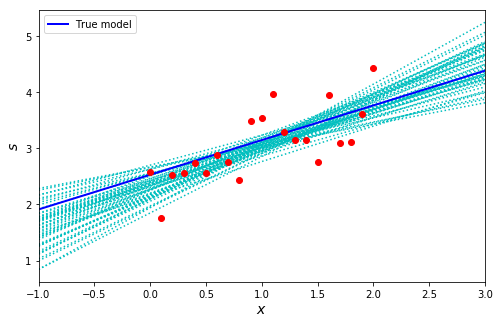

In [21]:
# Drawing weights from the posterior
# First, compute the cholesky decomposition of the covariance matrix
# L = <FILL IN>

for l in range(50):
    # Generate a random sample from the posterior distribution
    # w_l = <FILL IN>

    # Compute predictions for the inputs in the data matrix
    # p_l = <FILL IN>

    # Plot prediction function
    # plt.plot(<FILL IN>, 'c:');

# Compute predictions for the inputs in the data matrix and using the true model
# p_truew = <FILL IN>

# Plot the true model
plt.plot(X2, p_truew, 'b', label='True model', linewidth=2);

# Plot the training points
plt.plot(X,s,'r.',markersize=12);

plt.xlim((x2_min,x2_max));
plt.legend(loc='best')
plt.xlabel('$x$',fontsize=14);
plt.ylabel('$s$',fontsize=14);

### 4.3. Plotting the confidence intervals

On top of the previous figure (copy here your code from the previous section), plot functions

$${\mathbb E}\left\{f({\bf x}^\ast)\mid{\bf s}\right\}$$

and

$${\mathbb E}\left\{f({\bf x}^\ast)\mid{\bf s}\right\} \pm 2 \sqrt{{\mathbb V}\left\{f({\bf x}^\ast)\mid{\bf s}\right\}}$$

(i.e., the posterior mean of $f({\bf x}^\ast)$, as well as two standard deviations above and below).

It is possible to show analytically that this region comprises $95.45\%$ probability of the posterior probability $p(f({\bf x}^\ast)\mid {\bf s})$ at each ${\bf x}^\ast$.

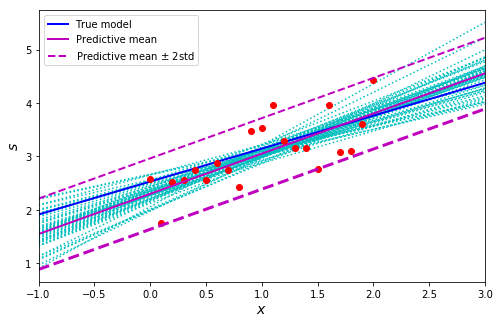

In [22]:
# Note that you can re-use code from sect. 4.2 to solve this exercise

# Plot sample functions from the posterior, and the training points
# <SOL>
# </SOL>    

# Plot the posterior mean.
# mean_ast = <FILL IN>
plt.plot(X2, mean_ast, 'm', label='Predictive mean', linewidth=2);

# Plot the posterior mean \pm 2 std
# std_ast = <FILL IN>
# plt.plot(<FILL IN>, 'm--', label='Predictive mean $\pm$ 2std', linewidth=2);
# plt.plot(<FILL IN>, 'm--', linewidth=3);


plt.legend(loc='best')
plt.xlabel('$x$',fontsize=14);
plt.ylabel('$s$',fontsize=14);


Plot now ${\mathbb E}\left\{s({\bf x}^\ast)\mid{\bf s}\right\} \pm 2 \sqrt{{\mathbb V}\left\{s({\bf x}^\ast)\mid{\bf s}\right\}}$ (note that the posterior means of $f({\bf x}^\ast)$ and $s({\bf x}^\ast)$ are the same, so there is no need to plot it again). Notice that $95.45\%$ of observed data lie now within the newly designated region. These new limits establish a confidence range for our predictions. See how the uncertainty grows as we move away from the interpolation region to the extrapolation areas.

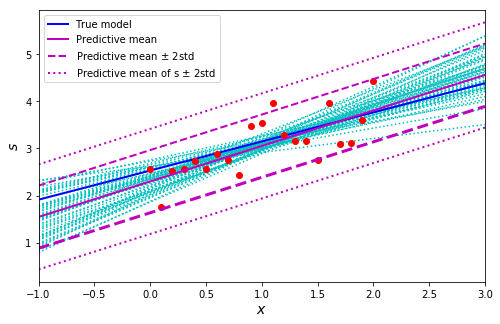

In [23]:
# Plot sample functions confidence intervals and sampling points
# Note that you can simply copy and paste most of the code used in the cell above.

# <SOL>
# </SOL>    

# Compute the standad deviations for s and plot the confidence intervals
# <SOL>
# </SOL>

plt.legend(loc='best')
plt.xlabel('$x$',fontsize=14);
plt.ylabel('$s$',fontsize=14);


## 5. Bayesian Inference with real data. The stocks dataset.


Once our code has been tested on synthetic data, we will use it with real data. 

* [1] Load data corresponding to the evolution of the stocks of 10 airline companies. This data set is an adaptation of the Stock dataset from http://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html, which in turn was taken from the StatLib Repository, http://lib.stat.cmu.edu/

In [24]:
# <SOL>
# </SOL>

* [2] Normalize the data so all training sample components have zero mean and unit standard deviation. Store the normalized training and test samples in 2D numpy arrays `Xtrain` and `Xtest`, respectively.

In [25]:
# <SOL>
# </SOL>

* [3] Add an all-ones column to the input data. Store the resulting 2D arrays in variables `Ztrain` and `Ztest`, respectively.

In [26]:
# <SOL>
# </SOL>

After running this code, you will have inside matrix `Ztrain` an initial column of ones and the evolution of (normalized) price for 9 airlines, whereas vecto `Ytrain` will contain a single column with the price evolution of the tenth airline. The objective of the regression task is to estimate the price of the tenth airline from the prices of the other nine.

### 5.1. Hyperparameter selection

Since the values $\sigma_p$ and $\sigma_\varepsilon$ are no longer known, a first rough estimation is needed (we will soon see how to estimate these values in a principled way).

To this end, we will adjust them using the LS solution to the regression problem:

   - $\sigma_p^2$ will be taken as the average of the square values of ${\hat {\bf w}}_{LS}$
   - $\sigma_\varepsilon^2$ will be taken as two times the average of the square of the residuals when using ${\hat {\bf w}}_{LS}$

In [27]:
# w_LS, residuals, rank, s = <FILL IN>
# sigma_p = <FILL IN>
# sigma_eps = <FILL IN>
 

### 5.2. Posterior pdf of the weight vector

Using the previous values for the hyperparameters, compute the <i>a posteriori</i> mean and covariance matrix of the weight vector ${\bf w}$. Instead of two weights there will now be 10.

In [29]:
# <SOL>
# </SOL>

The resulting posterior is:

In [ ]:
print('mean_w = {0}'.format(mean_w))
print('Cov_w = {0}'.format(Cov_w))

### 5.3. Model assessment

In order to verify the performance of the resulting model, compute the posterior mean and variance of each of the test outputs from the posterior over ${\bf w}$. I.e, compute ${\mathbb E}\left\{s({\bf x}^\ast)\mid{\bf s}\right\}$ and $\sqrt{{\mathbb V}\left\{s({\bf x}^\ast)\mid{\bf s}\right\}}$ for each test sample ${\bf x}^\ast$ contained in each row of `Xtest`. Be sure not to use the outputs `Ytest` at any point during this process.

Store the predictive mean and variance of all test samples in two column vectors called `m_y` and `v_y`, respectively.

In [30]:
# <SOL>
# </SOL>

Compute now the mean square error (MSE) and the negative log-predictive density (NLPD) with the following code:

In [31]:
# <SOL>
# </SOL>

Results should be:

In [32]:
print('MSE = {0}'.format(MSE))
print('NLPD = {0}'.format(NLPD))

MSE = 6.113536189755457
NLPD = [[ 2.3863814 ]
 [ 2.39178593]
 [ 2.38595186]
 [ 2.38597254]
 [ 2.38922042]
 [ 2.38545056]
 [ 2.384985  ]
 [ 2.38564726]
 [ 2.38455668]
 [ 2.38936416]
 [ 2.38530169]
 [ 2.3854882 ]
 [ 2.38746194]
 [ 2.3872575 ]
 [ 2.38809581]
 [ 2.38743151]
 [ 2.38906303]
 [ 2.38434779]
 [ 2.38488422]
 [ 2.38737229]
 [ 2.38801778]
 [ 2.38558366]
 [ 2.38681013]
 [ 2.38588795]
 [ 2.38647667]
 [ 2.38927774]
 [ 2.38609303]
 [ 2.38540024]
 [ 2.39417609]
 [ 2.38942199]
 [ 2.38727254]
 [ 2.38776588]
 [ 2.39279105]
 [ 2.39026127]
 [ 2.3847123 ]
 [ 2.38347846]
 [ 2.38468962]
 [ 2.38674575]
 [ 2.38867797]
 [ 2.38839021]
 [ 2.39076741]
 [ 2.38927287]
 [ 2.3933799 ]
 [ 2.38593986]
 [ 2.38609376]
 [ 2.38875667]
 [ 2.38476045]
 [ 2.38580593]
 [ 2.3877009 ]
 [ 2.3858102 ]
 [ 2.3854591 ]
 [ 2.38568417]
 [ 2.38614019]
 [ 2.38490808]
 [ 2.38568365]
 [ 2.38648536]
 [ 2.38616238]
 [ 2.38576225]
 [ 2.38807472]
 [ 2.38730754]
 [ 2.38604584]
 [ 2.38568623]
 [ 2.38489563]
 [ 2.38883876]
 [ 2.3843

These two measures reveal the quality of our predictor (with lower values revealing higher quality). The first measure (MSE) only compares the predictive mean with the actual value and always has a positive value (if zero was reached, it would mean a perfect prediction). It does not take into account predictive variance. The second measure (NLPD) takes into account both the deviation and the predictive variance (uncertainty) to measure the quality of the probabilistic prediction (a high error in a prediction that was already known to have high variance has a smaller penalty, but also, announcing a high variance when the prediction error is small won’t award such a good score).